In [12]:
!pip install pyreadstat


In [14]:
import sys
!{sys.executable} -m pip install pyreadstat



  Using cached narwhals-2.10.2-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 812.7 kB/s eta 0:00:03
   -------- ------------------------------- 0.5/2.4 MB 4.5 MB/s eta 0:00:01
   ----------------------------------- ---- 2.2/2.4 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 11.9 MB/s eta 0:00:00
Using cached narwhals-2.10.2-py3-none-any.whl (419 kB)


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

fotbal_path = r"C:\Users\gary_\Downloads\gcd15_act1\gcd15_act1_fotbal.sav"
credit_path = r"C:\Users\gary_\Downloads\gcd15_act1\gcd15_act1_ej5tarea5.sav"

fotbal_df, _ = pyreadstat.read_sav(fotbal_path)
credit_df, _ = pyreadstat.read_sav(credit_path)

fotbal_df.head(), credit_df.head(), fotbal_df.shape, credit_df.shape

(      y      x1      x2    x3    x4    x5     x6    x7      x8      x9
 0  10.0  2113.0  1985.0  38.9  64.7   4.0  868.0  59.7  2205.0  1917.0
 1  11.0  2003.0  2855.0  38.8  61.3   3.0  615.0  55.0  2096.0  1575.0
 2  11.0  2957.0  1737.0  40.1  60.0  14.0  914.0  65.6  1847.0  2175.0
 3  13.0  2285.0  2905.0  41.6  45.3  -4.0  957.0  61.4  1903.0  2476.0
 4  10.0  2971.0  1666.0  39.2  53.8  15.0  836.0  66.1  1457.0  1866.0,
     age   ed  employ  address  income  debtinc   creddebt   othdebt  default  \
 0  41.0  3.0    17.0     12.0   176.0      9.3  11.359392  5.008608      1.0   
 1  27.0  1.0    10.0      6.0    31.0     17.3   1.362202  4.000798      0.0   
 2  40.0  1.0    15.0     14.0    55.0      5.5   0.856075  2.168925      0.0   
 3  41.0  1.0    15.0     14.0   120.0      2.9   2.658720  0.821280      0.0   
 4  24.0  2.0     2.0      0.0    28.0     17.3   1.787436  3.056564      1.0   
 
       ZRE_1  
 0  0.486847  
 1 -0.497338  
 2 -0.100687  
 3 -0.150464  
 4  

In [57]:
fotbal_df.info()
fotbal_df.describe()

credit_df.info()
credit_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       28 non-null     float64
 1   x1      28 non-null     float64
 2   x2      28 non-null     float64
 3   x3      28 non-null     float64
 4   x4      28 non-null     float64
 5   x5      28 non-null     float64
 6   x6      28 non-null     float64
 7   x7      28 non-null     float64
 8   x8      28 non-null     float64
 9   x9      28 non-null     float64
dtypes: float64(10)
memory usage: 2.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   ed        700 non-null    float64
 2   employ    700 non-null    float64
 3   address   700 non-null    float64
 4   income    700 non-null    float64
 5   debtinc   700 non-null    flo

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,ZRE_1
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429,-0.000054
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727,0.975940
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000,-4.361356
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000,-0.476062
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987568,0.000000,-0.222684
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000,0.184133
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000,7.547690


In [58]:
fotbal_df.isnull().sum()

y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
x9    0
dtype: int64

In [45]:
credit_df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
ZRE_1       0
dtype: int64

In [59]:
fotbal_df.columns


Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype='object')

In [25]:
credit_df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default', 'ZRE_1'],
      dtype='object')

In [65]:
rename_map = {
    "y":  "Games_won",
    "x1": "Rushing_yards",
    "x2": "Passing_yards",
    "x3": "Punting_avg",
    "x4": "Field_goal_pct",
    "x5": "Turnover_diff",
    "x6": "Penalty_yards",
    "x7": "Percent_rushing",
    "x8": "Opp_rushing_yards",
    "x9": "Opp_passing_yards",
}
fotbal_df = fotbal_df.rename(columns=rename_map)
fotbal_df["Games_won"].describe()


count    28.000000
mean      6.964286
std       3.479912
min       0.000000
25%       4.000000
50%       6.500000
75%      10.000000
max      13.000000
Name: Games_won, dtype: float64

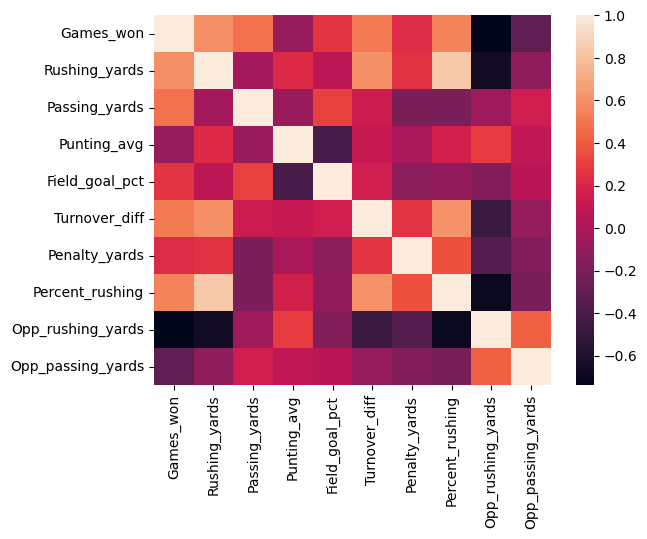

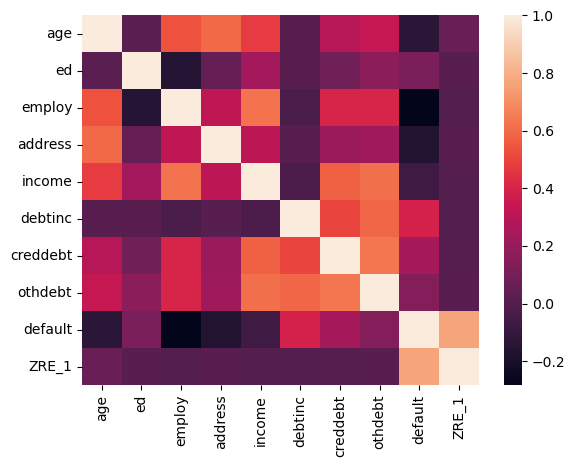

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(fotbal_df.corr(), annot=False)
plt.show()

sns.heatmap(credit_df.corr(), annot=False)
plt.show()


In [68]:
fotbal_df["Games_won"].describe()
fotbal_df.columns


Index(['Games_won', 'Rushing_yards', 'Passing_yards', 'Punting_avg',
       'Field_goal_pct', 'Turnover_diff', 'Penalty_yards', 'Percent_rushing',
       'Opp_rushing_yards', 'Opp_passing_yards'],
      dtype='object')

MODELO 1: REGRESIÓN — Datos de Fútbol Americano

Modelo Simple

In [69]:
# ---------- Modelo simple: y ~ x2 + x7 + x8 ----------
X_simple = fotbal[["x2","x7","x8"]].astype(float)
y = fotbal["y"].astype(float)

lin = LinearRegression()
lin.fit(X_simple, y)

y_hat = lin.predict(X_simple)
res = y - y_hat

rmse = mean_squared_error(y, y_hat, squared=False)
mae  = mean_absolute_error(y, y_hat)
r2   = r2_score(y, y_hat)

# Validación cruzada de R^2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(lin, X_simple, y, cv=cv, scoring="r2")

print("=== MODELO SIMPLE (y ~ x2 + x7 + x8) ===")
print("Coeficientes:", dict(zip(["x2","x7","x8"], lin.coef_)))
print("Intercepto: ", lin.intercept_)
print(f"RMSE (in-sample): {rmse:.4f}")
print(f"MAE  (in-sample): {mae:.4f}")
print(f"R^2  (in-sample): {r2:.4f}")
print(f"R^2 medio CV (5-fold): {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")


NameError: name 'fotbal' is not defined

2. Ajuste del modelo (y ~ x2 + x7 + x8)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = fotbal_df[["x2", "x7", "x8"]]
y = fotbal_df["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Coeficientes: [ 0.00405209  0.17917943 -0.00553427]
Intercepto: -0.6700602783625227
R²: 0.4310765856683585
RMSE: 2.3451211067247395


3. Gráficos de residuos

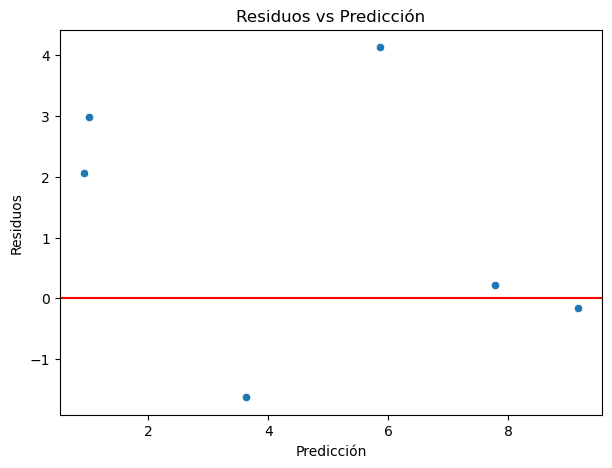

In [30]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicción")
plt.show()


4. Predicción solicitada (x2 = 2300, x7 = 56, x8 = 2100)

In [31]:
new_team = pd.DataFrame({
    "x2": [2300],
    "x7": [56],
    "x8": [2100]
})

prediction = model.predict(new_team)
print("Predicción de juegos ganados:", prediction[0])


Predicción de juegos ganados: 7.061821716491262


5. Selección de variables (usando p-valores)

In [32]:
import statsmodels.api as sm

X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     29.44
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           3.27e-08
Time:                        00:28:28   Log-Likelihood:                -52.532
No. Observations:                  28   AIC:                             113.1
Df Residuals:                      24   BIC:                             118.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8084      7.901     -0.229      0.8

MODELO 2: Regresión Logística

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = credit_df.drop(columns=["default"])
y = credit_df["default"]

# Escalado (muy recomendable)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion matrix:
 [[132   0]
 [  0  43]]
Reporte:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       132
         1.0       1.00      1.00      1.00        43

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



MODELO 3: Selección de variables (AIC con Statsmodels)

In [34]:
import statsmodels.api as sm

X_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_const).fit()
print(logit_model.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      690
Method:                           MLE   Df Model:                            9
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                   1.000
Time:                        00:33:02   Log-Likelihood:            -1.5584e-06
converged:                      False   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                2.444e-167
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6182   8.54e+04  -8.92e-05      1.000   -1.67e+05    1.67e+05
age            0.1846   2495.679    7.4e-05      1.000   -4891.25

C:\Users\gary_\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\gary_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
fotbal_df["y"].describe()
X = fotbal_df[["x2","x7","x8"]]
y = fotbal_df["y"]


In [36]:
rename_map = {
    "y": "games_won",
    "x2": "rushing_yards",
    "x7": "percent_rushing",
    "x8": "opp_rushing_yards",
}
fotbal_df = fotbal_df.rename(columns=rename_map)

fotbal_df["games_won"].describe()
X = fotbal_df[["rushing_yards","percent_rushing","opp_rushing_yards"]]
y = fotbal_df["games_won"]


In [37]:
fotbal_df = fotbal_df.drop(columns=[c for c in fotbal_df.columns if c.upper().startswith("ZRE_")], errors="ignore")


In [38]:
import statsmodels.api as sm
X_ols = sm.add_constant(X)
m1 = sm.OLS(y, X_ols).fit()
print(m1.summary())

# Predicción con x2=2300, x7=56, x8=2100
X_new = sm.add_constant(
    pd.DataFrame([{"rushing_yards":2300, "percent_rushing":56, "opp_rushing_yards":2100}])
)
pred = m1.get_prediction(X_new)
pred.summary_frame(alpha=0.05)[["mean","mean_ci_lower","mean_ci_upper"]]


                            OLS Regression Results                            
Dep. Variable:              games_won   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     29.44
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           3.27e-08
Time:                        00:37:09   Log-Likelihood:                -52.532
No. Observations:                  28   AIC:                             113.1
Df Residuals:                      24   BIC:                             118.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8084      7.90

ValueError: shapes (1,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

Text(0.5, 1.0, 'QQ plot residuos')

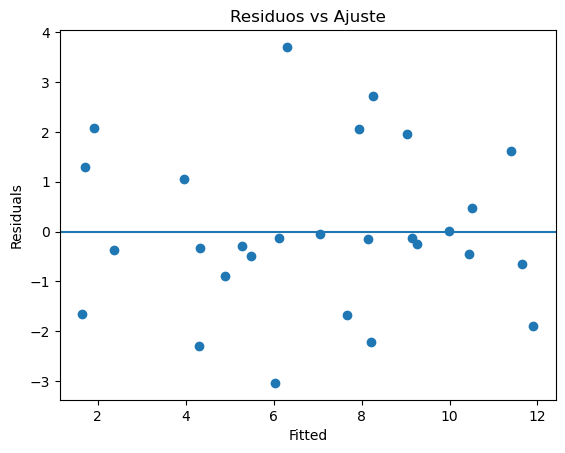

<Figure size 640x480 with 0 Axes>

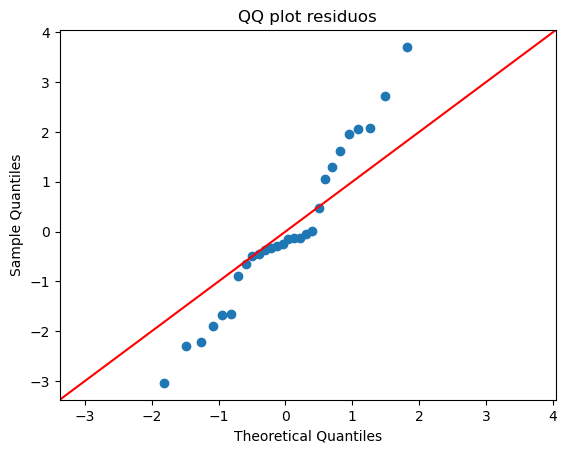

In [39]:
import matplotlib.pyplot as plt
res = m1.resid
plt.figure(); plt.scatter(m1.fittedvalues, res); plt.axhline(0); plt.xlabel("Fitted"); plt.ylabel("Residuals"); plt.title("Residuos vs Ajuste")
plt.figure(); sm.qqplot(res, line="45"); plt.title("QQ plot residuos")


In [40]:
PerfectSeparationWarning
ConvergenceWarning: ... failed to converge

SyntaxError: invalid syntax (3257620571.py, line 2)